In [1]:
# importing modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import seaborn as sns
import warnings
import statsmodels.api as sm
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('./datasets/corporate_stress_dataset.csv')
dataset = df.copy()
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 30 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   ID                                50000 non-null  int64  
 1   Age                               50000 non-null  int64  
 2   Gender                            50000 non-null  object 
 3   Marital_Status                    50000 non-null  object 
 4   Job_Role                          50000 non-null  object 
 5   Experience_Years                  50000 non-null  int64  
 6   Monthly_Salary_INR                50000 non-null  float64
 7   Working_Hours_per_Week            50000 non-null  int64  
 8   Commute_Time_Hours                50000 non-null  float64
 9   Remote_Work                       50000 non-null  bool   
 10  Stress_Level                      50000 non-null  int64  
 11  Health_Issues                     37459 non-null  object 
 12  Comp

In [3]:
dataset

,ID,Age,Gender,Marital_Status,Job_Role,Experience_Years,Monthly_Salary_INR,Working_Hours_per_Week,Commute_Time_Hours,Remote_Work,Stress_Level,Health_Issues,Company_Size,Department,Sleep_Hours,Physical_Activity_Hours_per_Week,Mental_Health_Leave_Taken,Manager_Support_Level,Work_Pressure_Level,Annual_Leaves_Taken,Work_Life_Balance,Family_Support_Level,Job_Satisfaction,Performance_Rating,Team_Size,Training_Opportunities,Gender_Bias_Experienced,Discrimination_Experienced,Burnout_Symptoms,Location
0,1,56,Non-Binary,Widowed,Developer,5,102703.08,44,1.72,True,0,NaN,Small,Marketing,5.6,1.9,False,1,0,15,9,2,5,10,38,False,True,True,No,Tier-3
1,2,46,Female,Single,Analyst,20,165583.91,54,0.62,True,7,NaN,Large,IT,9.0,3.5,True,7,10,12,9,1,10,9,72,True,True,True,No,Tier-3
2,3,32,Female,Single,Developer,10,38005.39,81,1.22,False,7,Physical,Medium,HR,7.9,8.4,False,2,7,13,6,1,1,1,67,False,False,False,Yes,Metro
3,4,60,Female,Divorced,Analyst,26,51127.36,79,2.03,False,6,Mental,Small,IT,4.1,6.4,True,6,2,15,8,10,5,10,98,True,True,False,Yes,Metro
4,5,25,Male,Married,Sales,29,174597.45,63,1.45,True,8,Both,Large,Sales,4.0,9.2,True,9,10,11,3,1,9,2,85,True,False,False,No,Tier-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,49996,43,Female,Widowed,HR,8,34594.10,58,1.66,False,0,Mental,Small,Marketing,7.5,4.0,False,4,6,25,4,8,7,3,69,True,True,False,No,Tier-3
49996,49997,45,Male,Single,Analyst,31,117925.92,42,1.58,False,1,Physical,Medium,HR,4.5,0.1,False,0,3,0,10,3,0,4,60,True,True,True,Occasional,Tier-2
49997,49998,43,Female,Divorced,Manager,7,109814.51,49,1.49,True,6,Mental,Medium,Sales,7.8,5.4,False,4,1,24,0,0,10,6,56,False,True,False,No,Metro
49998,49999,62,Male,Married,HR,9,74918.42,72,2.64,False,4,Both,Medium,Admin,5.6,7.1,True,1,1,15,10,4,2,8,50,True,False,True,Yes,Tier-2


In [4]:
relevant_columns = [
    "Job_Role", "Experience_Years", "Monthly_Salary_INR", 
    "Work_Life_Balance", "Job_Satisfaction", "Training_Opportunities",
    "Performance_Rating"
]
df_selected = df[relevant_columns]

# mapping for industires (split jobs to relevant industires)
industry_mapping = {
    "Developer": "Technology", "Analyst": "Finance", "Sales": "Business",
    "Doctor": "Healthcare", "Nurse": "Healthcare", "Engineer": "Engineering",
    "Scientist": "Research", "Teacher": "Education", "Professor": "Education",
    "Lawyer": "Law", "Accountant": "Finance", "Marketing Manager": "Business",
    "Consultant": "Consulting", "HR Manager": "Human Resources", "Data Scientist": "Technology",
    "Product Manager": "Technology", "Cybersecurity Analyst": "Technology", "Graphic Designer": "Creative",
    "Journalist": "Media", "Pharmacist": "Healthcare"
}
new_industry_mapping = {
    'Developer': 'Technology',
    'Analyst': 'Finance',
    'Sales': 'Retail',
    'Manager': 'Manufacturing',
    'HR': 'Education',
    'Support': 'Telecommunications'
}

df_selected["Industry"] = df_selected["Job_Role"].map(industry_mapping)
df_selected = df_selected.dropna(subset=["Industry"])
df_selected

,Job_Role,Experience_Years,Monthly_Salary_INR,Work_Life_Balance,Job_Satisfaction,Training_Opportunities,Performance_Rating,Industry
0,Developer,5,102703.08,9,5,False,10,Technology
1,Analyst,20,165583.91,9,10,True,9,Finance
2,Developer,10,38005.39,6,1,False,1,Technology
3,Analyst,26,51127.36,8,5,True,10,Finance
4,Sales,29,174597.45,3,9,True,2,Business
...,...,...,...,...,...,...,...,...
49979,Developer,40,101926.23,6,7,True,6,Technology
49982,Developer,40,96755.52,0,2,True,3,Technology
49987,Developer,35,64348.47,8,7,True,8,Technology
49994,Sales,7,38252.85,1,9,False,5,Business


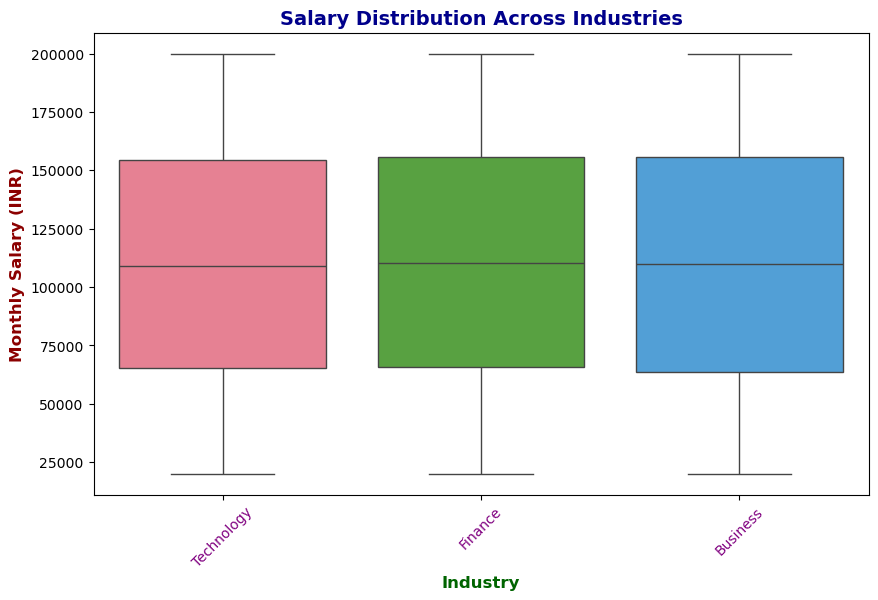

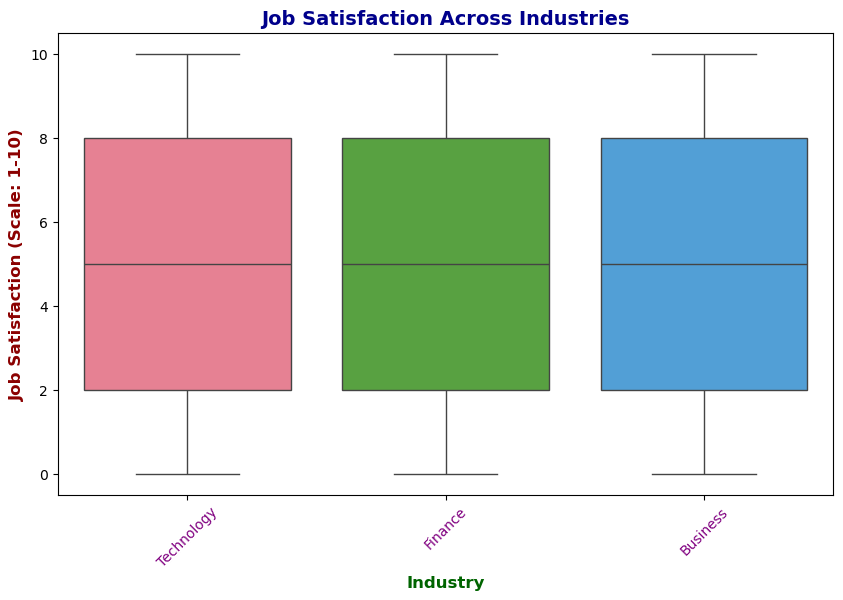

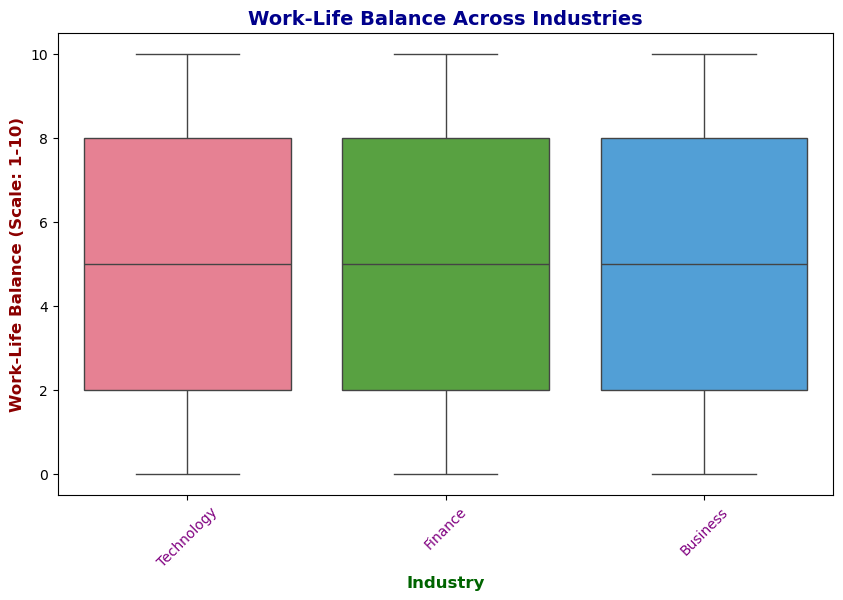

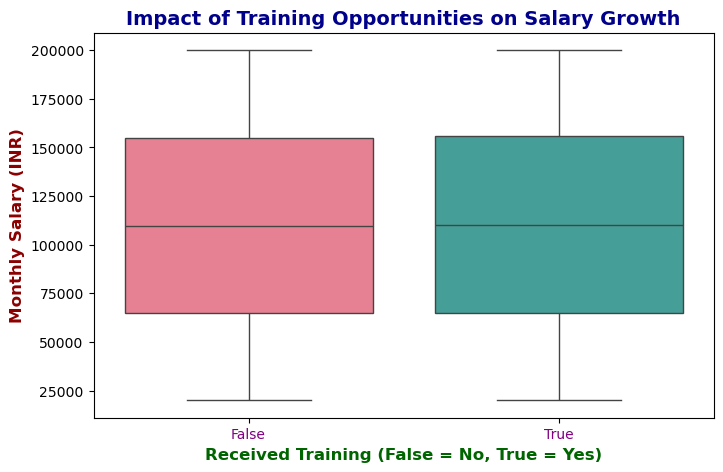

In [5]:
palette = "husl"  # RGB COLORING ISH


plt.figure(figsize=(10, 6))
sns.boxplot(x="Industry", y="Monthly_Salary_INR", data=df_selected, palette=palette)
plt.title("Salary Distribution Across Industries", fontsize=14, fontweight='bold', color='darkblue')
plt.xlabel("Industry", fontsize=12, fontweight='bold', color='darkgreen')
plt.ylabel("Monthly Salary (INR)", fontsize=12, fontweight='bold', color='darkred')
plt.xticks(rotation=45, fontsize=10, color='purple')
plt.show()


plt.figure(figsize=(10, 6))
sns.boxplot(x="Industry", y="Job_Satisfaction", data=df_selected, palette=palette)
plt.title("Job Satisfaction Across Industries", fontsize=14, fontweight='bold', color='darkblue')
plt.xlabel("Industry", fontsize=12, fontweight='bold', color='darkgreen')
plt.ylabel("Job Satisfaction (Scale: 1-10)", fontsize=12, fontweight='bold', color='darkred')
plt.xticks(rotation=45, fontsize=10, color='purple')
plt.show()


plt.figure(figsize=(10, 6))
sns.boxplot(x="Industry", y="Work_Life_Balance", data=df_selected, palette=palette)
plt.title("Work-Life Balance Across Industries", fontsize=14, fontweight='bold', color='darkblue')
plt.xlabel("Industry", fontsize=12, fontweight='bold', color='darkgreen')
plt.ylabel("Work-Life Balance (Scale: 1-10)", fontsize=12, fontweight='bold', color='darkred')
plt.xticks(rotation=45, fontsize=10, color='purple')
plt.show()

plt.figure(figsize=(8, 5))
sns.boxplot(x="Training_Opportunities", y="Monthly_Salary_INR", data=df_selected, palette=palette)
plt.title("Impact of Training Opportunities on Salary Growth", fontsize=14, fontweight='bold', color='darkblue')
plt.xlabel("Received Training (False = No, True = Yes)", fontsize=12, fontweight='bold', color='darkgreen')
plt.ylabel("Monthly Salary (INR)", fontsize=12, fontweight='bold', color='darkred')
plt.xticks(fontsize=10, color='purple')
plt.show()

### Trying to pull analysis from other columns

In [6]:
dataset['Industry'] = dataset['Job_Role'].map(new_industry_mapping)

In [7]:
# Looking at the only col with missing values
dataset['Health_Issues']

# Missing values suggest that they have no health issues

0             NaN
1             NaN
2        Physical
3          Mental
4            Both
           ...   
49995      Mental
49996    Physical
49997      Mental
49998        Both
49999        Both
Name: Health_Issues, Length: 50000, dtype: object

In [8]:
# Label encode health Issues

health_issues_map = {
  'Physical': 1,
  'Mental': 2,
  'Both': 3
}

burnout_map = {
  'No': 0,
  'Yes': 1,
  'Occasional': 2,
}

def encode_health_issues(value):
  if pd.isnull(value):
    return 0 #no health issues
  
  global health_issues_map
  return health_issues_map[value]
 
def encode_burnout(value):
  global burnout_map
  return burnout_map[value]

def encode_true_false(value):
  if value == True:
    return 1
  return 0

dataset['Health_Issues'] = dataset['Health_Issues'].apply(encode_health_issues)
dataset['Burnout_Symptoms'] = dataset['Burnout_Symptoms'].apply(encode_burnout)

bool_cols = ['Training_Opportunities' , 'Gender_Bias_Experienced', 'Discrimination_Experienced']
for col in bool_cols:
  dataset[col] = dataset[col].apply(encode_true_false)

In [9]:
dataset['Health_Issues']

0        0
1        0
2        1
3        2
4        3
        ..
49995    2
49996    1
49997    2
49998    3
49999    3
Name: Health_Issues, Length: 50000, dtype: int64

In [10]:
dataset

,ID,Age,Gender,Marital_Status,Job_Role,Experience_Years,Monthly_Salary_INR,Working_Hours_per_Week,Commute_Time_Hours,Remote_Work,Stress_Level,Health_Issues,Company_Size,Department,Sleep_Hours,Physical_Activity_Hours_per_Week,Mental_Health_Leave_Taken,Manager_Support_Level,Work_Pressure_Level,Annual_Leaves_Taken,Work_Life_Balance,Family_Support_Level,Job_Satisfaction,Performance_Rating,Team_Size,Training_Opportunities,Gender_Bias_Experienced,Discrimination_Experienced,Burnout_Symptoms,Location,Industry
0,1,56,Non-Binary,Widowed,Developer,5,102703.08,44,1.72,True,0,0,Small,Marketing,5.6,1.9,False,1,0,15,9,2,5,10,38,0,1,1,0,Tier-3,Technology
1,2,46,Female,Single,Analyst,20,165583.91,54,0.62,True,7,0,Large,IT,9.0,3.5,True,7,10,12,9,1,10,9,72,1,1,1,0,Tier-3,Finance
2,3,32,Female,Single,Developer,10,38005.39,81,1.22,False,7,1,Medium,HR,7.9,8.4,False,2,7,13,6,1,1,1,67,0,0,0,1,Metro,Technology
3,4,60,Female,Divorced,Analyst,26,51127.36,79,2.03,False,6,2,Small,IT,4.1,6.4,True,6,2,15,8,10,5,10,98,1,1,0,1,Metro,Finance
4,5,25,Male,Married,Sales,29,174597.45,63,1.45,True,8,3,Large,Sales,4.0,9.2,True,9,10,11,3,1,9,2,85,1,0,0,0,Tier-1,Retail
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,49996,43,Female,Widowed,HR,8,34594.10,58,1.66,False,0,2,Small,Marketing,7.5,4.0,False,4,6,25,4,8,7,3,69,1,1,0,0,Tier-3,Education
49996,49997,45,Male,Single,Analyst,31,117925.92,42,1.58,False,1,1,Medium,HR,4.5,0.1,False,0,3,0,10,3,0,4,60,1,1,1,2,Tier-2,Finance
49997,49998,43,Female,Divorced,Manager,7,109814.51,49,1.49,True,6,2,Medium,Sales,7.8,5.4,False,4,1,24,0,0,10,6,56,0,1,0,0,Metro,Manufacturing
49998,49999,62,Male,Married,HR,9,74918.42,72,2.64,False,4,3,Medium,Admin,5.6,7.1,True,1,1,15,10,4,2,8,50,1,0,1,1,Tier-2,Education


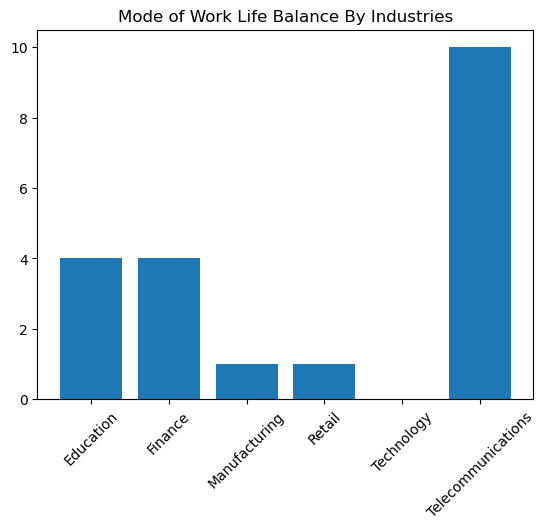

In [11]:
## Goal, group by work life balance, figure out how industries work life balances are affected

# Plotting the work life balance against industries
# work life balance is abbrev to wlb
mode_wlb = dataset.groupby(by='Industry')['Work_Life_Balance'].apply(lambda x: x.mode())

X = list(map(lambda x : x[0] , mode_wlb.index))
y = mode_wlb.values

plt.bar(X , y)
plt.xticks(rotation=45)
plt.title('Mode of Work Life Balance By Industries')
plt.show()

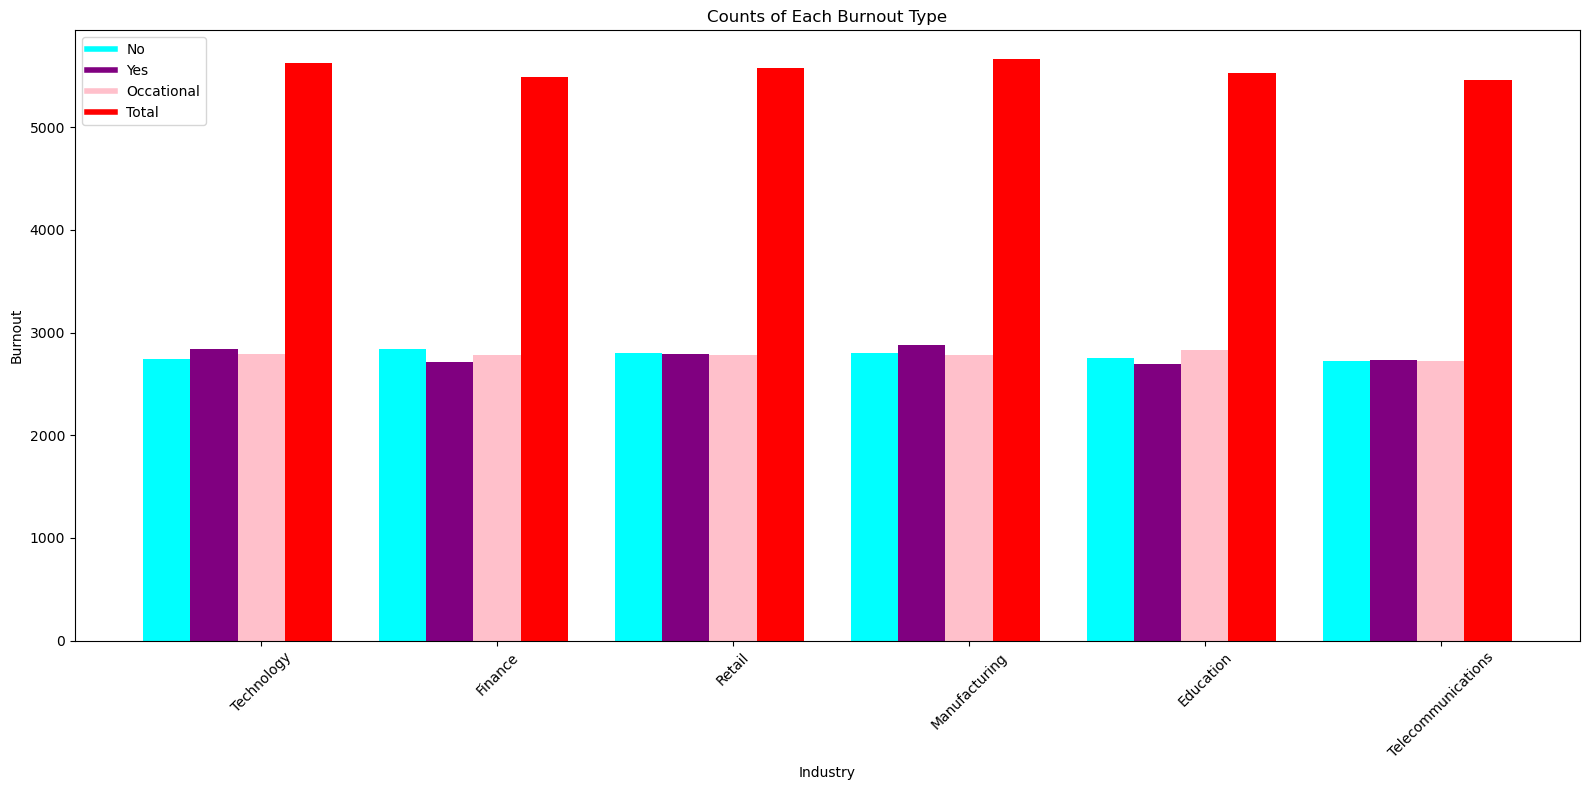

In [ ]:
# Plotting for Burout
## Bar 
plt.figure(figsize=(16 , 8))
industries = dataset['Industry'].unique()

for i , industry in enumerate(industries):
  X = np.array([i])
  condition = dataset['Industry'] == industry
  data = dataset[condition][['Burnout_Symptoms']].value_counts()
  

  plt.bar(X - 0.2 , data.get(0 , 0) , width=0.2 , color='cyan')
  plt.bar(X , data.get(1 , 0) , width=0.2 ,  color='purple' )
  plt.bar(X + 0.2 , data.get(2 , 0) , width=0.2 , color='pink')
  plt.bar(X + 0.4 , data.get(2 , 0) + data.get(1 , 0) , width=0.2 , color='red')


handles = [
    plt.Line2D([0], [0], color='cyan', lw=4),  # for 'No'
    plt.Line2D([0], [0], color='purple', lw=4),  # for 'Yes'
    plt.Line2D([0], [0], color='pink', lw=4),  # for 'Occasional'
    plt.Line2D([0], [0], color='red', lw=4)  # for 'Total'
]
  
plt.xlabel('Industry')
plt.ylabel('Burnout')
plt.xticks([p + 0.2 for p in range(len(industries))] , industries , rotation=45)
plt.title('Counts of Each Burnout Type')
plt.legend(handles=handles , labels=['No' , 'Yes' , 'Occational' , 'Total'])
plt.tight_layout()
plt.show()

This shows that in every industry, about 66% of the employees have experienced burnout while working

This may suggest that corporate work environments may not have such a gentle work environment; regardless of industry

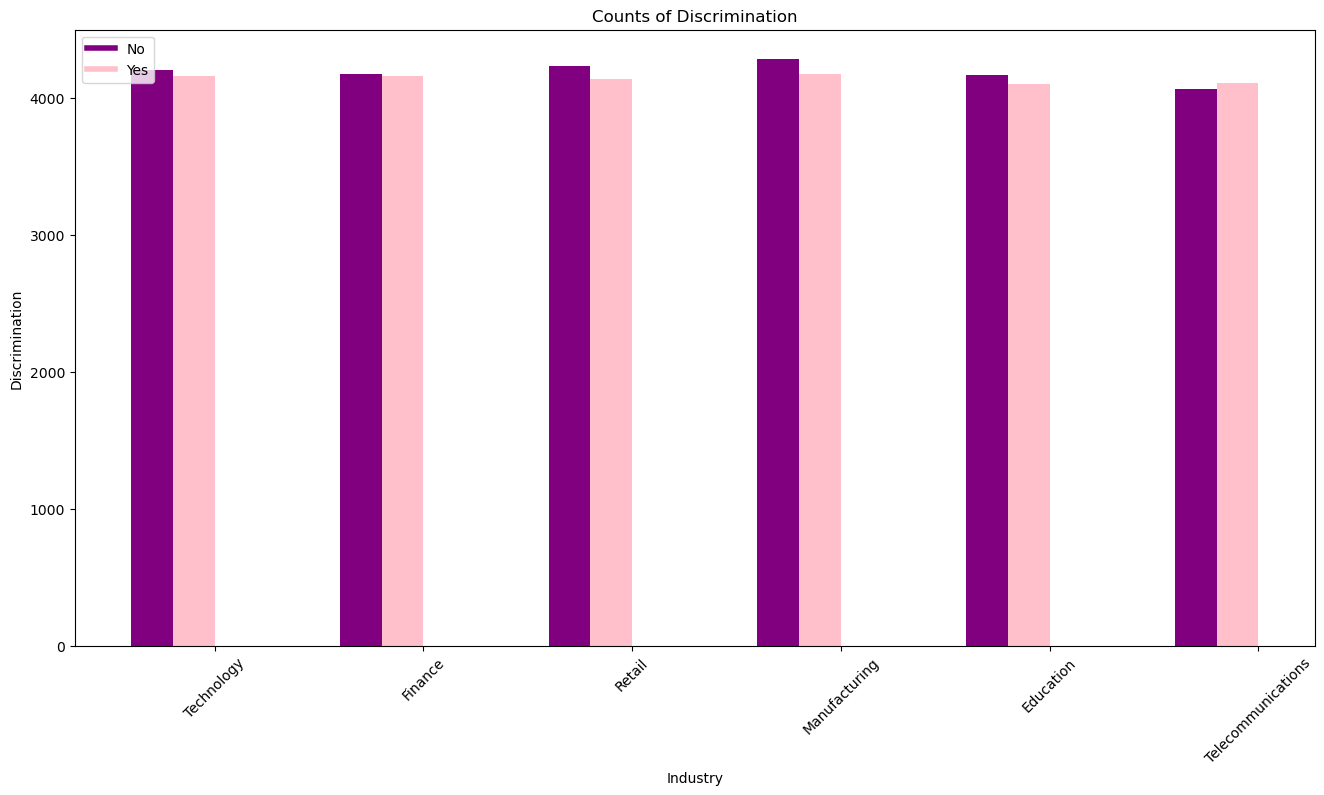

In [13]:
# Plotting for Bias
plt.figure(figsize=(16 , 8))
industries = dataset['Industry'].unique()

for i , industry in enumerate(industries):
  X = np.array([i])
  condition = dataset['Industry'] == industry
  data = dataset[condition][['Discrimination_Experienced']].value_counts()

  plt.bar(X - 0.1 , data.get(0 , 0) , width=0.2 ,  color='purple' )
  plt.bar(X + 0.1 , data.get(1 , 0) , width=0.2 , color='pink')


handles = [
    plt.Line2D([0], [0], color='purple', lw=4),  # for 'No'
    plt.Line2D([0], [0], color='pink', lw=4),  # for 'Yes'
]
  
plt.xlabel('Industry')
plt.ylabel('Discrimination')
plt.xticks([p + 0.2 for p in range(len(industries))] , industries , rotation=45)
plt.title('Counts of Discrimination')
plt.legend(handles=handles , labels=['No' , 'Yes'] , loc='upper left')
plt.show()

Around 50% of employees face discrimination

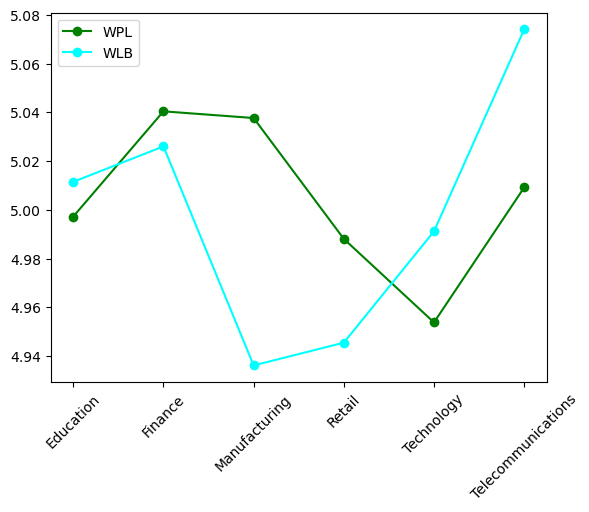

In [44]:
# Plotting the work pressure level
industries_work_pressure_group = dataset.pivot_table(columns='Industry' , values='Work_Pressure_Level' , aggfunc='mean')
labels = industries_work_pressure_group.columns
data = industries_work_pressure_group.values.flatten()

industries_wlb = dataset.pivot_table(columns='Industry' , values='Work_Life_Balance' , aggfunc='mean')
X = industries_wlb.columns
y = industries_wlb.values.flatten()

plt.plot(labels , data , marker='o' , color='green' , label='WPL')
plt.plot(X, y, marker='o' , color='cyan' , label='WLB')
plt.legend()
plt.xticks(rotation=45)
plt.show()



There isn't any real relationship between WLB and WPL in each industry

But both Finance and Manufacturing Generally have a higher WPL than the others

On the contrary, Technology and Telecommunications have a higher WLB compared to their WPL

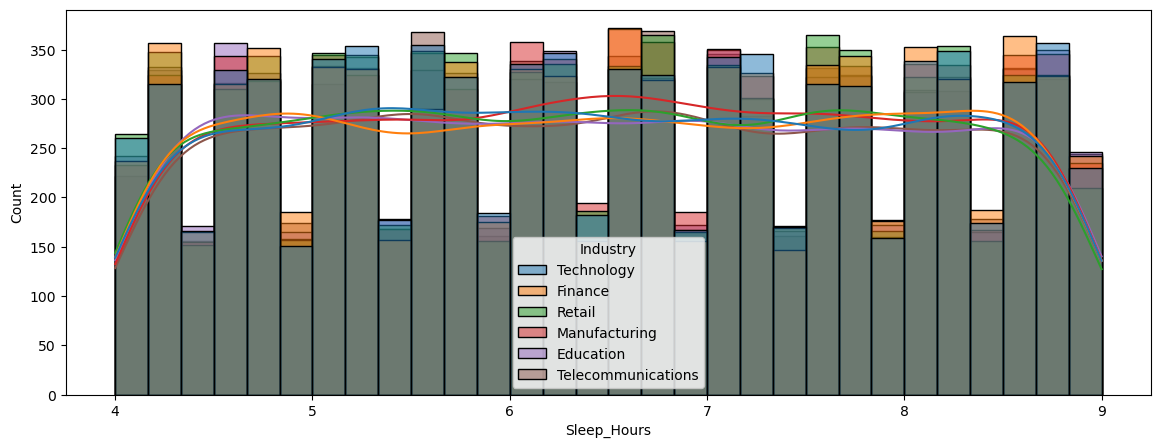

In [42]:
# Plotting Hist and KDE
plt.figure(figsize=(14 , 5))
sns.histplot(data=dataset, x='Sleep_Hours', hue="Industry", bins=30, kde=True)
plt.show()

In [14]:
# Pie experience mean 
exp_year_group = dataset.pivot_table(index='Industry' , values='Experience_Years' , aggfunc='mean')
                             

                                 OLS Regression Results                                
Dep. Variable:     Monthly_Salary_INR   R-squared (uncentered):                   0.604
Model:                            OLS   Adj. R-squared (uncentered):              0.604
Method:                 Least Squares   F-statistic:                          7.632e+04
Date:                Mon, 10 Feb 2025   Prob (F-statistic):                        0.00
Time:                        00:36:15   Log-Likelihood:                     -6.3329e+05
No. Observations:               50000   AIC:                                  1.267e+06
Df Residuals:                   49999   BIC:                                  1.267e+06
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

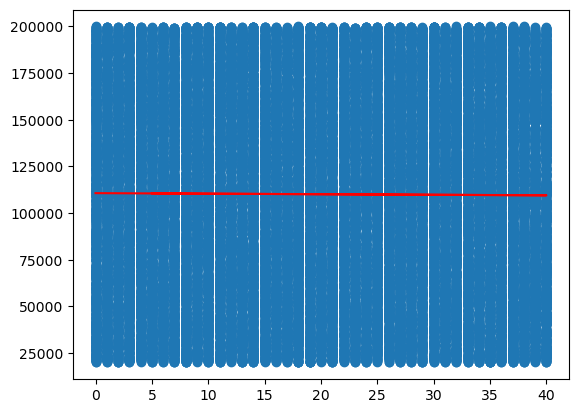

In [15]:
# Scatter experience on salary
response = dataset['Monthly_Salary_INR']
explain = dataset['Experience_Years']

model = sm.OLS(response , explain).fit()
print(model.summary())
m , c = np.polyfit(explain , response , deg=1)
                 

plt.plot(explain , m * explain + c , color='red')
plt.scatter(explain , response)
plt.show()

                                        OLS Regression Results                                       
Dep. Variable:     Physical_Activity_Hours_per_Week   R-squared (uncentered):                   0.716
Model:                                          OLS   Adj. R-squared (uncentered):              0.716
Method:                               Least Squares   F-statistic:                          1.259e+05
Date:                              Mon, 10 Feb 2025   Prob (F-statistic):                        0.00
Time:                                      00:36:15   Log-Likelihood:                     -1.2724e+05
No. Observations:                             50000   AIC:                                  2.545e+05
Df Residuals:                                 49999   BIC:                                  2.545e+05
Df Model:                                         1                                                  
Covariance Type:                          nonrobust                               

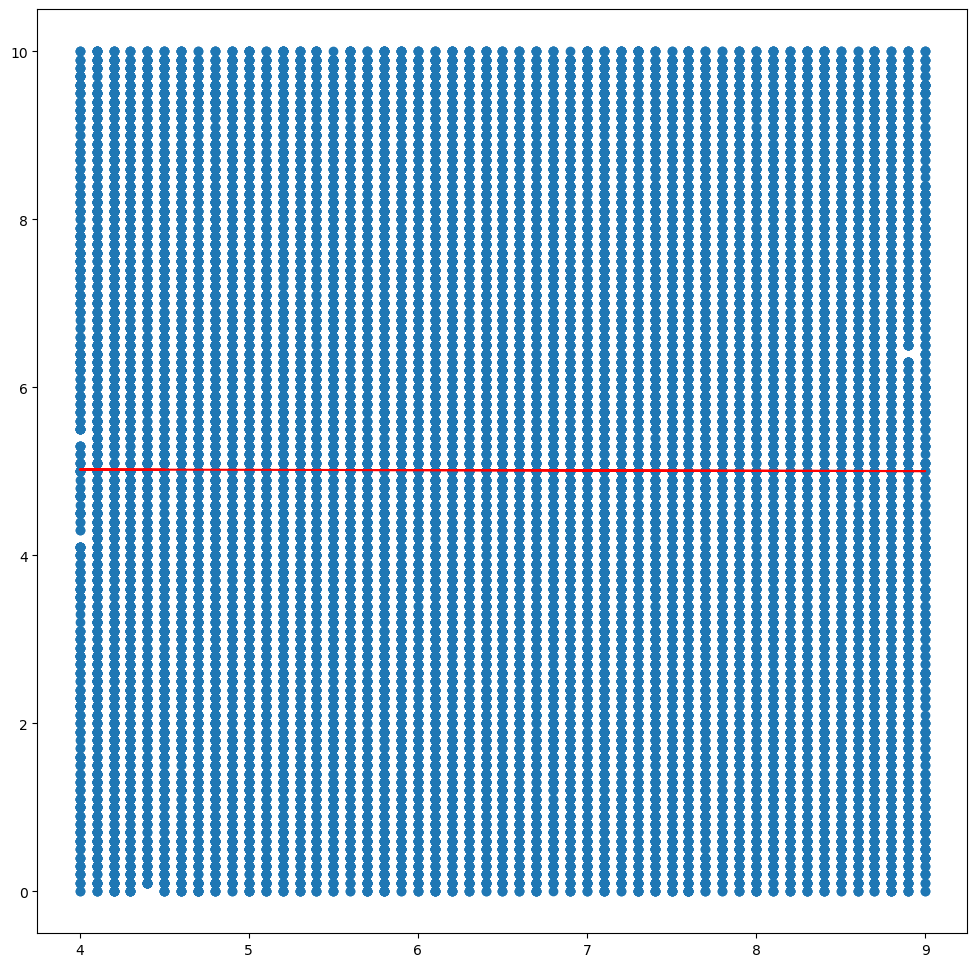

In [16]:
# Scatter salary on work life balance
plt.figure(figsize=(12 , 12))
response = dataset['Physical_Activity_Hours_per_Week']
explain = dataset['Sleep_Hours']

model = sm.OLS(response , explain).fit()
print(model.summary())
m , c = np.polyfit(explain , response , deg=1)
                 

plt.plot(explain , m * explain + c , color='red')
plt.scatter(explain , response)
plt.show()

In [17]:
%matplotlib tk
X = dataset['Work_Life_Balance']
y = dataset['Work_Pressure_Level']
z = dataset['Working_Hours_per_Week']

ax = plt.axes(projection='3d')
ax.scatter(X , y , z)
ax.set_xlabel('Work Life balance')
ax.set_ylabel('Work Pressure Level')
ax.set_zlabel('Working hours per week')
plt.show()
%matplotlib inline

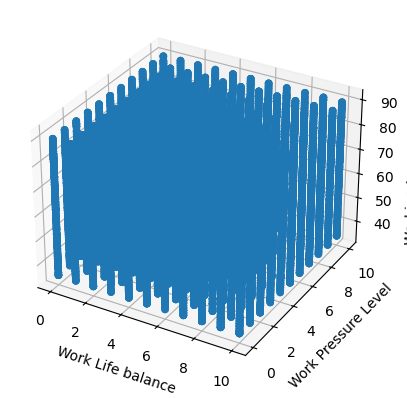

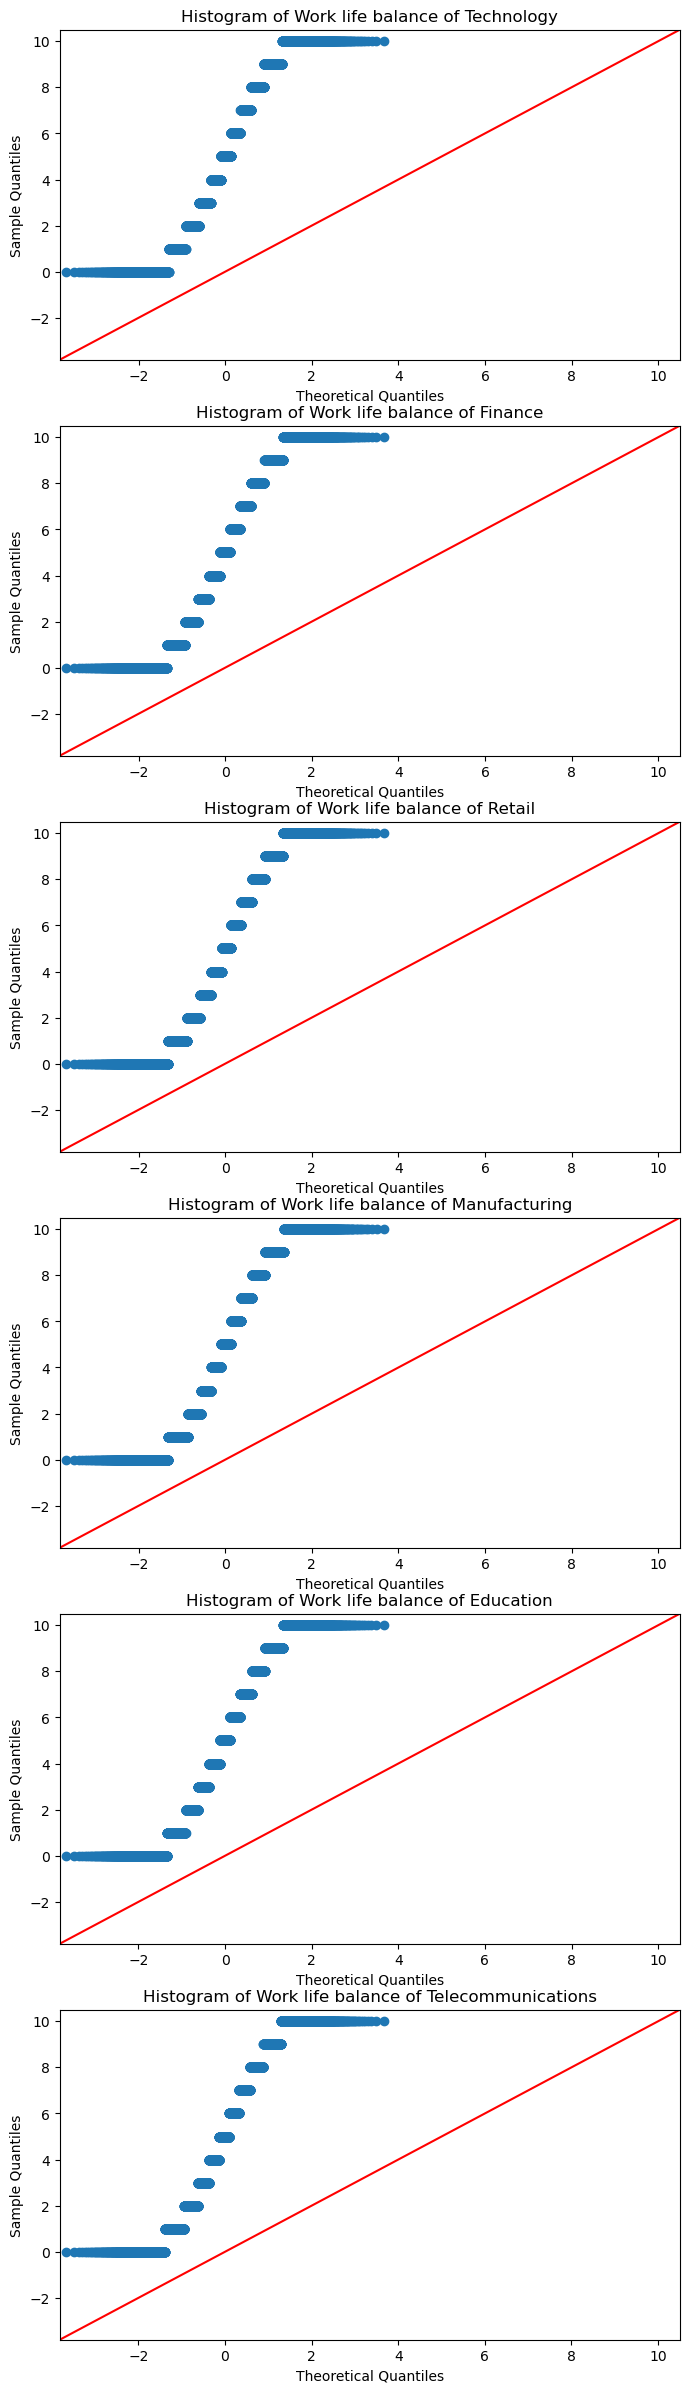

In [18]:
%matplotlib inline
industries = dataset['Industry'].unique()
fig , axes = plt.subplots(len(industries), 1, figsize=(8 , 30))


for i in range(len(industries)):
  condition = dataset['Industry'] == industries[i]
  data = dataset[condition]['Work_Life_Balance']
  sm.qqplot(data, line='45' , ax=axes[i])
  axes[i].set_title(f'Histogram of Work life balance of {industries[i]}')
 
plt.show()
# Since the upper tail deviates further from normality than the lower tail
# It is likely that the data is positive skewed
